# Logic and Loops

This lesson covers:

* Mixing logic and loops 

Begin by loading the data in momentum.csv.


In [1]:
# Setup: Load the momentum data

import numpy as np
import pandas as pd

momentum = pd.read_csv("data/momentum.csv", index_col="date", parse_dates=True)

print(momentum.head())

mom_01 = momentum["mom_01"]
mom_10 = momentum["mom_10"]
mom_05 = momentum["mom_05"]

            mom_01  mom_02  mom_03  mom_04  mom_05  mom_06  mom_07  mom_08  \
date                                                                         
2016-01-04    0.67   -0.03   -0.93   -1.11   -1.47   -1.66   -1.40   -2.08   
2016-01-05   -0.36    0.20   -0.37    0.28    0.16    0.18   -0.22    0.25   
2016-01-06   -4.97   -2.33   -2.60   -1.16   -1.70   -1.45   -1.15   -1.46   
2016-01-07   -4.91   -1.91   -3.03   -1.87   -2.31   -2.30   -2.70   -2.31   
2016-01-08   -0.40   -1.26   -0.98   -1.26   -1.13   -1.02   -0.96   -1.42   

            mom_09  mom_10  
date                        
2016-01-04   -1.71   -2.67  
2016-01-05    0.29    0.13  
2016-01-06   -1.14   -0.45  
2016-01-07   -2.36   -2.66  
2016-01-08   -0.94   -1.32  


## Problem: Logical Statements and for Loops
Use a for loop along with an `if` statement to simulate an asymmetric random
walk of the form 

$$y_{i}=y_{i-1}+e_{i}+I_{[e_{i}<0]}e_{i}$$

where $I_{[e_{i}<0]}$ is known as an indicator variable that takes the value
1 if the statement in brackets is true. Plot y. $e$ is a standard normal
shock. Use `cumsum` to simulate a symmetric one (`z`), and plot the two using
the code in the cell below.
 

In [2]:
e = np.random.standard_normal(100)
y = np.zeros(100)
y[0] = e[0]
for i in range(1, 100):
    y[i] = y[i-1]
    if e[i] < 0:
        y[i] += 2 * e[i]
    else:
        y[i] += e[i]

z = np.cumsum(e)

Plot the two random walks using the code.  We will cover data visualization
in a later lesson. 

```python
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(z)
plt.legend(["y", "z"])
```

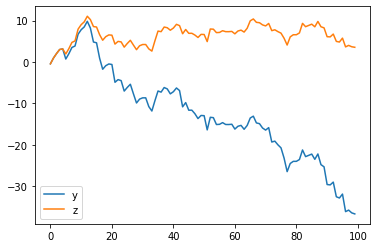

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(z)
plt.legend(["y", "z"])


## Problem: Simulate the asymmetricc random walk without an `if`-`then`

Use boolean multiplication to simulate the same random walk without using
an `if`-`then` statement. 

In [4]:
y = np.zeros(100)
y[0] = e[0]
for i in range(1, 100):
    y[i] = y[i-1] + e[i] + e[i] * (e[i] < 0)

z = np.cumsum(e)

In [5]:
# Setup: Plot the data
%matplotlib inline

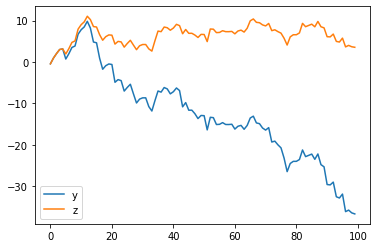

In [6]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(z)
plt.legend(["y", "z"])


## Problem: Selecting Elements using Logical Statements
For portfolio 1 and portfolio 10, select the elements that are $<0$,
$\geq 0$ and exactly equal to $0$. Next select the elements where both
portfolios are less than $0$. 


In [7]:
mom_01_neg = mom_01[mom_01 < 0]
mom_10_neg = mom_10[mom_10 < 0]
print(mom_01_neg[:10])
print(mom_10_neg[:10])

date
2016-01-05   -0.36
2016-01-06   -4.97
2016-01-07   -4.91
2016-01-08   -0.40
2016-01-11   -5.14
2016-01-12   -1.84
2016-01-13   -4.88
2016-01-15   -3.85
2016-01-19   -4.74
2016-01-20   -1.27
Name: mom_01, dtype: float64
date
2016-01-04   -2.67
2016-01-06   -0.45
2016-01-07   -2.66
2016-01-08   -1.32
2016-01-13   -3.71
2016-01-15   -2.40
2016-01-20   -0.42
2016-01-25   -1.12
2016-01-27   -2.02
2016-02-02   -1.70
Name: mom_10, dtype: float64


In [8]:
mom_01_eq0 = mom_01[mom_01 == 0]
# There are none, so this series is empty
print(mom_01_eq0)

mom_10_eq0 = mom_10[mom_10 == 0]
print(mom_10_eq0)

Series([], Name: mom_01, dtype: float64)
date
2016-05-31    0.0
2017-02-10    0.0
2017-11-08    0.0
Name: mom_10, dtype: float64


In [9]:
mom_01_neg = mom_01[mom_01 >= 0]
print(mom_01_neg[:10])

date
2016-01-04    0.67
2016-01-14    3.85
2016-01-21    7.67
2016-01-22    4.24
2016-01-26    4.75
2016-01-28    1.04
2016-01-29    6.12
2016-02-03    4.92
2016-02-04    3.26
2016-02-12    5.19
Name: mom_01, dtype: float64
